In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import division
import sklearn
from sklearn import feature_selection
from __future__ import print_function


In [24]:
#Making the target variable as the last column, because for the test data we need to have the same indexes for preprocessing as training data
dataset = pd.read_csv('/Users/shailendrapatil/Downloads/DScasestudy1.txt',sep ='\t')
b = pd.DataFrame(data=dataset[[0]])
dataset=dataset.drop(dataset.columns[0],axis=1)
dataset['response']=b
dataset.head()
###Test data can be imported here 
#dataset_test = pd.read_csv('test_data,sep ='\t')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562,response
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
#Checking for any missing values
sum(np.sum(pd.isnull(dataset) == True))
#check missing values for test data as well and then append accordingly

0

In [26]:
### Findinf correaltion of all columns and removing columns which are 0, this means no correaltion at all
from sklearn.metrics import matthews_corrcoef
correaltion =list()
for i in range(len(dataset.columns)):
    correaltion.append(matthews_corrcoef(dataset[[-1]],dataset[[i]]))  
index = [x for x in range(len(correaltion)) if correaltion[x]==0.0]
len(index)

5669

In [27]:
#This columns will have no importance in our analysis. So we will remove those columns from our dataset
dataset_clean=dataset.drop(dataset.columns[index],axis=1)

### Code for test data can be added here similar to this 

In [28]:
len(dataset_clean.columns)

10894

In [29]:
#Taking the response variable
target = dataset_clean[[-1]].as_matrix()


In [30]:
# feature selection
#Below package check Mutual information between attributes and target variable
#If it returns 0 it means target and feature are independent
#If it returns greater than 0 it means target and feature are dependent
from sklearn import feature_selection
index_MI=sklearn.feature_selection.mutual_info_classif(dataset_clean.ix[:,0:-1],target,discrete_features='auto',n_neighbors=3,copy=True,random_state=None)

In [31]:
index_MI

array([ 0.        ,  0.        ,  0.00095456, ...,  0.017285  ,
        0.        ,  0.        ])

In [32]:
#No of colums for which mutual information is 0 i.e the Target variable and attributes are independent
len(index_MI[index_MI==0])

5355

In [33]:
dataset_clean=dataset_clean.drop(dataset_clean.ix[:,0:].columns[index_MI==0],axis=1)

#Same process for test data

In [34]:
x=dataset_clean.iloc[:, :-1].values
y=dataset_clean.iloc[:,-1].values
len(x[1,])

5538

In [35]:
from sklearn.ensemble import RandomForestClassifier
from boruta import boruta_py

In [36]:
#Boruta Implementation for feature selection
forest = RandomForestClassifier(random_state = 0)
feat_selector = boruta_py.BorutaPy(forest, n_estimators='auto', verbose=2,max_iter=200)
feat_selector.fit(x, y)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	5538
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	5538
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	5538
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	5538
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	5538
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	5538
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	5538
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	0
Tentative: 	91
Rejected: 	5447
Iteration: 	9 / 200
Confirmed: 	14
Tentative: 	77
Rejected: 	5447
Iteration: 	10 / 200
Confirmed: 	14
Tentative: 	77
Rejected: 	5447
Iteration: 	11 / 200
Confirmed: 	14
Tentative: 	77
Rejected: 	5447
Iteration: 	12 / 200
Confirmed: 	14
Tentative: 	62
Rejected: 	5462
Iteration: 	13 / 200
Confirmed: 	14
Tentative: 	62
Rejected: 	5462
Iteration: 	14 / 200
Confirmed: 	14
Tentative: 	62
Rejected: 	5462
Iteration: 	15 / 200
Confirmed: 	14
Tentative: 	62
Rejected: 	5462
Iteration: 	16 / 20

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x10b099820>,
            verbose=0, warm_start=False),
     max_iter=200, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x10b099820>,
     two_step=True, verbose=2)

In [37]:
X_filtered = feat_selector.transform(x)
X_filtered

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [38]:
#splitting the data into training data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_filtered,y,test_size=0.25,random_state=0)



In [39]:
#Baseline model

In [40]:
## Finding optimal parameters for decision tree

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(random_state=0,criterion='entropy')
classifier_dt.fit(x_train, y_train)
y_pred_dt = classifier_dt.predict(x_test)

from sklearn.model_selection import GridSearchCV
parameters_dt = [{'criterion':['gini'],'max_features':[1,2,3,4,5,6,7,8,9,10]},{'criterion':['entropy'],'max_features':[1,2,3,4,5,6,7,8,9,10]}]
grid_search = GridSearchCV(estimator=classifier_dt,param_grid=parameters_dt,cv=10,n_jobs=-1)
grid_search = grid_search.fit(x_train,y_train)
param_dt= grid_search.best_params_  
param_dt , grid_search.best_score_



({'criterion': 'gini', 'max_features': 6}, 0.8488664987405542)

In [41]:
#Building the decision tree model based on the best fit from grid search
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(random_state=0,criterion=param_dt['criterion'],max_features=param_dt['max_features'])
classifier_dt.fit(x_train, y_train)
y_pred_dt = classifier_dt.predict(x_test)


#Confusin Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

#10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_dt,X=x_train,y =y_train,cv=10)
fscores = cross_val_score(estimator=classifier_dt,X=x_train,y =y_train,cv=10,scoring='f1')
print('Accuracy:',accuracies.mean())
print('Variance:',accuracies.var())
print('Confusion Matrix',cm_dt)
accuracy_models =list()
varariance_models =list()
f_scores =list()
accuracy_models.append(accuracies.mean())
varariance_models.append(accuracies.var())
f_scores.append(fscores.mean())
print('f1 score is:',fscores.mean())

Accuracy: 0.849046278924
Variance: 0.00210400247223
Confusion Matrix [[95  9]
 [ 9 20]]
f1 score is: 0.644160300484


In [42]:
## Finding optimal parameters for Random Forest
#Random  Forest
from sklearn.tree import DecisionTreeClassifier
classifier_rf=RandomForestClassifier(random_state = 0,criterion="entropy")
classifier_rf.fit(x_train, y_train)
y_pred_dt = classifier_rf.predict(x_test)

from sklearn.model_selection import GridSearchCV
parameters_rf = [{'criterion':['gini'],'max_features':[1,2,3,4,5,6,7,8,9,10],'n_estimators':[10,50,75,100,200]},{'criterion':['entropy'],'max_features':[1,2,3,4,5,6,7,8,9,10],'n_estimators':[10,50,100,200]}]
grid_search = GridSearchCV(estimator=classifier_rf,param_grid=parameters_rf,cv=10,n_jobs=-1)
grid_search = grid_search.fit(x_train,y_train)                                                                                                                             
param_rf= grid_search.best_params_  
param_rf , grid_search.best_score_                                                       



({'criterion': 'gini', 'max_features': 7, 'n_estimators': 50},
 0.87153652392947101)

In [43]:
#Building the random forest model based on the best fit from grid search
#RandForest Model
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 0,criterion=param_rf['criterion'],max_features=param_rf['max_features'],n_estimators=param_rf['n_estimators'])
classifier_rf.fit(x_train, y_train)
y_pred_rf = classifier_rf.predict(x_test)

#Confusin Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

#10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf,X=x_train,y =y_train,cv=10)
fscores = cross_val_score(estimator=classifier_rf,X=x_train,y =y_train,cv=10,scoring='f1')
print('Accuracy:',accuracies.mean())
print('Variance:',accuracies.var())
print('Confusion Matrix',cm_rf)
accuracy_models.append(accuracies.mean())
varariance_models.append(accuracies.var())
f_scores.append(fscores.mean())
print('f1 score is:',fscores.mean())

Accuracy: 0.871808943089
Variance: 0.00412094236362
Confusion Matrix [[97  7]
 [ 9 20]]
f1 score is: 0.693795518207


In [44]:
## Finding optimal parameters for Bayes Classifier
#Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
classifier_bc = BernoulliNB()
classifier_bc.fit(x_train, y_train)
y_pred_bc = classifier_bc.predict(x_test)

from sklearn.model_selection import GridSearchCV
parameters_bc = [{'alpha':[0.2,0.4,0.6,0.8,1],'fit_prior':['True']},{'alpha':[0.2,0.4,0.6,0.8,1],'fit_prior':['False']}]
grid_search = GridSearchCV(estimator=classifier_bc,param_grid=parameters_bc,cv=10,n_jobs=-1)
grid_search = grid_search.fit(x_train,y_train)
param_bc= grid_search.best_params_  
param_bc , grid_search.best_score_                                                       

({'alpha': 0.8, 'fit_prior': 'True'}, 0.87657430730478592)

In [45]:
#Building the Bayes Classifier model based on the best fit from grid search
#Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
classifier_bc = BernoulliNB(alpha=param_bc['alpha'],fit_prior=param_bc['fit_prior'])
classifier_bc.fit(x_train, y_train)
y_pred_bc = classifier_bc.predict(x_test)

#Confusin Matrix
from sklearn.metrics import confusion_matrix
cm_bc = confusion_matrix(y_test, y_pred_bc)

#10 fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
accuracies = cross_val_score(estimator=classifier_bc,X=x_train,y =y_train,cv=10)
fscores = cross_val_score(estimator=classifier_bc,X=x_train,y =y_train,cv=10,scoring='f1')
print('Accuracy:',accuracies.mean())
print('Variance:',accuracies.var())
print('Confusion Matrix',cm_bc)
accuracy_models.append(accuracies.mean())
varariance_models.append(accuracies.var())
f_scores.append(fscores.mean())
print('f1 score is:',fscores.mean())

Accuracy: 0.876555659787
Variance: 0.00133321928701
Confusion Matrix [[103   1]
 [ 11  18]]
f1 score is: 0.680924369748


In [46]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state =0)
classifier_lr.fit(x_train,y_train)
y_pred_lr = classifier_lr.predict(x_test)

#Confusin Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

#10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr,X=x_train,y =y_train,cv=10)
fscores = cross_val_score(estimator=classifier_lr,X=x_train,y =y_train,cv=10,scoring='f1')
print('Accuracy:',accuracies.mean())
print('Variance:',accuracies.var())
print('Confusion Matrix',cm_bc)
accuracy_models.append(accuracies.mean())
varariance_models.append(accuracies.var())
f_scores.append(fscores.mean())
print('f1 score is:',fscores.mean())

Accuracy: 0.871677611007
Variance: 0.00129485689588
Confusion Matrix [[103   1]
 [ 11  18]]
f1 score is: 0.658900560224


In [47]:
accuracy_models , f_scores

([0.84904627892432782,
  0.87180894308943091,
  0.87655565978736705,
  0.87167761100687924],
 [0.64416030048382988,
  0.6937955182072828,
  0.68092436974789927,
  0.6589005602240896])

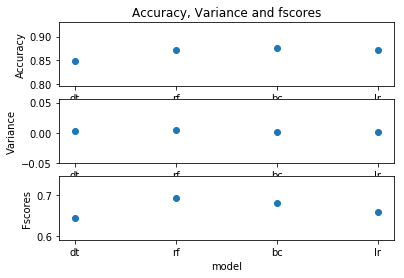

In [48]:
objects = ('dt','rf','bc','lr')
y_pos = np.arange(len(objects))
plt.subplot(3, 1, 1)
plt.scatter(y_pos, accuracy_models)
plt.xticks(y_pos, objects)
plt.title('Accuracy, Variance and fscores')
plt.ylabel('Accuracy')

plt.subplot(3, 1, 2)
plt.scatter(y_pos, varariance_models)
plt.xticks(y_pos, objects)
plt.ylabel('Variance')

plt.subplot(3, 1, 3)
plt.scatter(y_pos, f_scores)
plt.xticks(y_pos, objects)
plt.xlabel('model')
plt.ylabel('Fscores')


plt.show()


In [49]:
#Best Parameters of bayes classifier
param_rf

{'criterion': 'gini', 'max_features': 7, 'n_estimators': 50}